In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.shape)
print(test.shape)

(13645, 22)
(8745, 20)


In [4]:
train = pd.concat([train,test],axis=0)

In [5]:
train.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22390 entries, 0 to 8744
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    22390 non-null  int64  
 1   EmpName                  22390 non-null  object 
 2   LanguageOfCommunication  22390 non-null  object 
 3   Age                      22390 non-null  int64  
 4   Gender                   22390 non-null  object 
 5   JobProfileIDApplyingFor  22390 non-null  object 
 6   HighestDegree            22390 non-null  object 
 7   DegreeBranch             22390 non-null  object 
 8   GraduatingInstitute      22390 non-null  object 
 9   LatestDegreeCGPA         22390 non-null  int64  
 10  YearsOfExperince         22390 non-null  int64  
 11  GraduationYear           22390 non-null  int64  
 12  CurrentCTC               22390 non-null  int64  
 13  ExpectedCTC              22390 non-null  int64  
 14  MartialStatus          

In [7]:
# First let us drop first two columns as they are not required for prediction purposes
train1 = train.drop(["EmpID","EmpName"],axis=1)
# We can also drop BiasInfluentialFactor as a significant proportion of values are missing
train1 = train1.drop(["BiasInfluentialFactor"],axis=1)

In [8]:
# Now let us enumerate over each object column to seek the unique values they hold
# Then the object type would be converted into int type. It would help us to visualise and model the data easily
print(train1.LanguageOfCommunication.value_counts())
train1.LanguageOfCommunication=train1.LanguageOfCommunication.map({"English":0,"Hindi":1,"Native":2})

English    12281
Hindi       7821
Native      2288
Name: LanguageOfCommunication, dtype: int64


In [9]:
print(train1.Gender.value_counts() )
# For every 1 female, approx 2 male exist.
train1.Gender = train1.Gender.map({"Male":0,"Female":1,"Other":2})

Male      13781
Female     7023
Other      1586
Name: Gender, dtype: int64


In [10]:
print(train1.JobProfileIDApplyingFor.value_counts())
# As the values of this column doesn't need to be selectively mapped, 
# we can just use preprocessing module from sklearn
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train1.JobProfileIDApplyingFor = encoder.fit_transform(train1.JobProfileIDApplyingFor)

JR85289    7708
JR87525    5612
JR88879    2033
JR89890    1876
JR88873    1848
JR79193    1117
JR81165    1101
JR88654     679
JR70175     416
Name: JobProfileIDApplyingFor, dtype: int64


In [11]:
print(train1.HighestDegree.value_counts())
train1.HighestDegree = encoder.fit_transform(train1.HighestDegree)

B.Tech         9116
M.Tech         3355
BCA            2706
MS             2625
Dual M.Tech    2212
PhD            1085
Dual MBA       1072
MCA             219
Name: HighestDegree, dtype: int64


In [12]:
print(train1.DegreeBranch.value_counts())
train1.DegreeBranch = encoder.fit_transform(train.DegreeBranch)

Computer Science              7773
Information Technology        4914
Artificial Intelligence       3377
Electrical                    2934
Electronics                   2733
Electrical and Electronics     659
Name: DegreeBranch, dtype: int64


In [13]:
print(train1.GraduatingInstitute.value_counts())
train1.GraduatingInstitute = train1.GraduatingInstitute.map({"Tier 2":2,"Tier 1":1,"Tier 3":3})

Tier 2    10125
Tier 1     7788
Tier 3     4477
Name: GraduatingInstitute, dtype: int64


In [14]:
print(train1.MartialStatus.value_counts())
train1.MartialStatus = encoder.fit_transform(train1.MartialStatus)

Married    16117
Single      6273
Name: MartialStatus, dtype: int64


In [15]:
print(train1.CurrentDesignation.value_counts())
train1.CurrentDesignation = encoder.fit_transform(train1.CurrentDesignation)

SDE    8835
SSE    4556
DS     2870
BA     2752
EM     2257
SEM     448
DA      445
DE      227
Name: CurrentDesignation, dtype: int64


In [16]:
print(train1.CurrentCompanyType.value_counts())
train1.CurrentCompanyType = train.CurrentCompanyType.map({"Startup":0,"Enterprise":2,"MidSized":1})

Startup       10344
Enterprise     7171
MidSized       4875
Name: CurrentCompanyType, dtype: int64


In [17]:
train1.DepartmentInCompany = encoder.fit_transform(train1.DepartmentInCompany)

<AxesSubplot:>

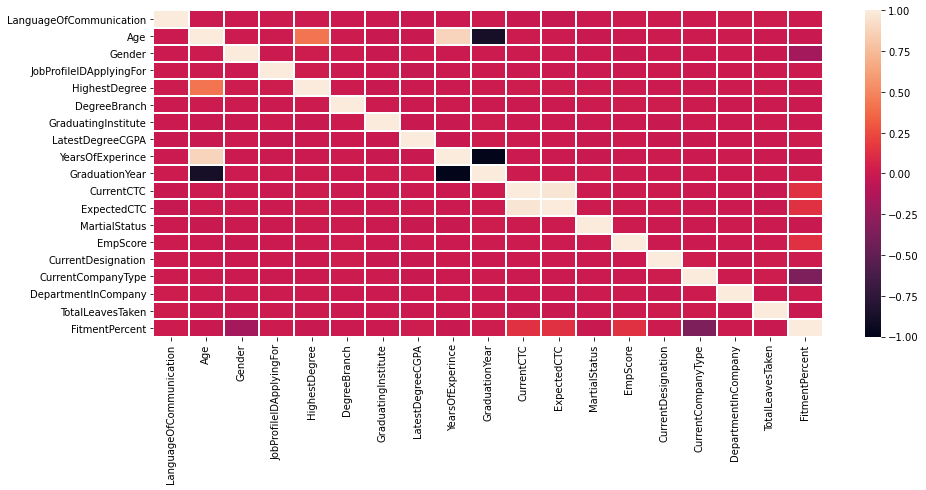

In [18]:
# As we have now coverted all the objects into float or int. It is now time to see the relation between different
# attributes
corr = train1.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,linewidths=0.1)

In [19]:
# As graduation Year and Experience are highly correlated (approaching 1 ) with Age we can remove them. 
# Same goes for expected ctc and current ctc. We can remove either of them
# We can let Highest Degree remain as there can be some non linear relations associated with it.
train2 = train1.drop(["GraduationYear","YearsOfExperince","ExpectedCTC"],axis=1)

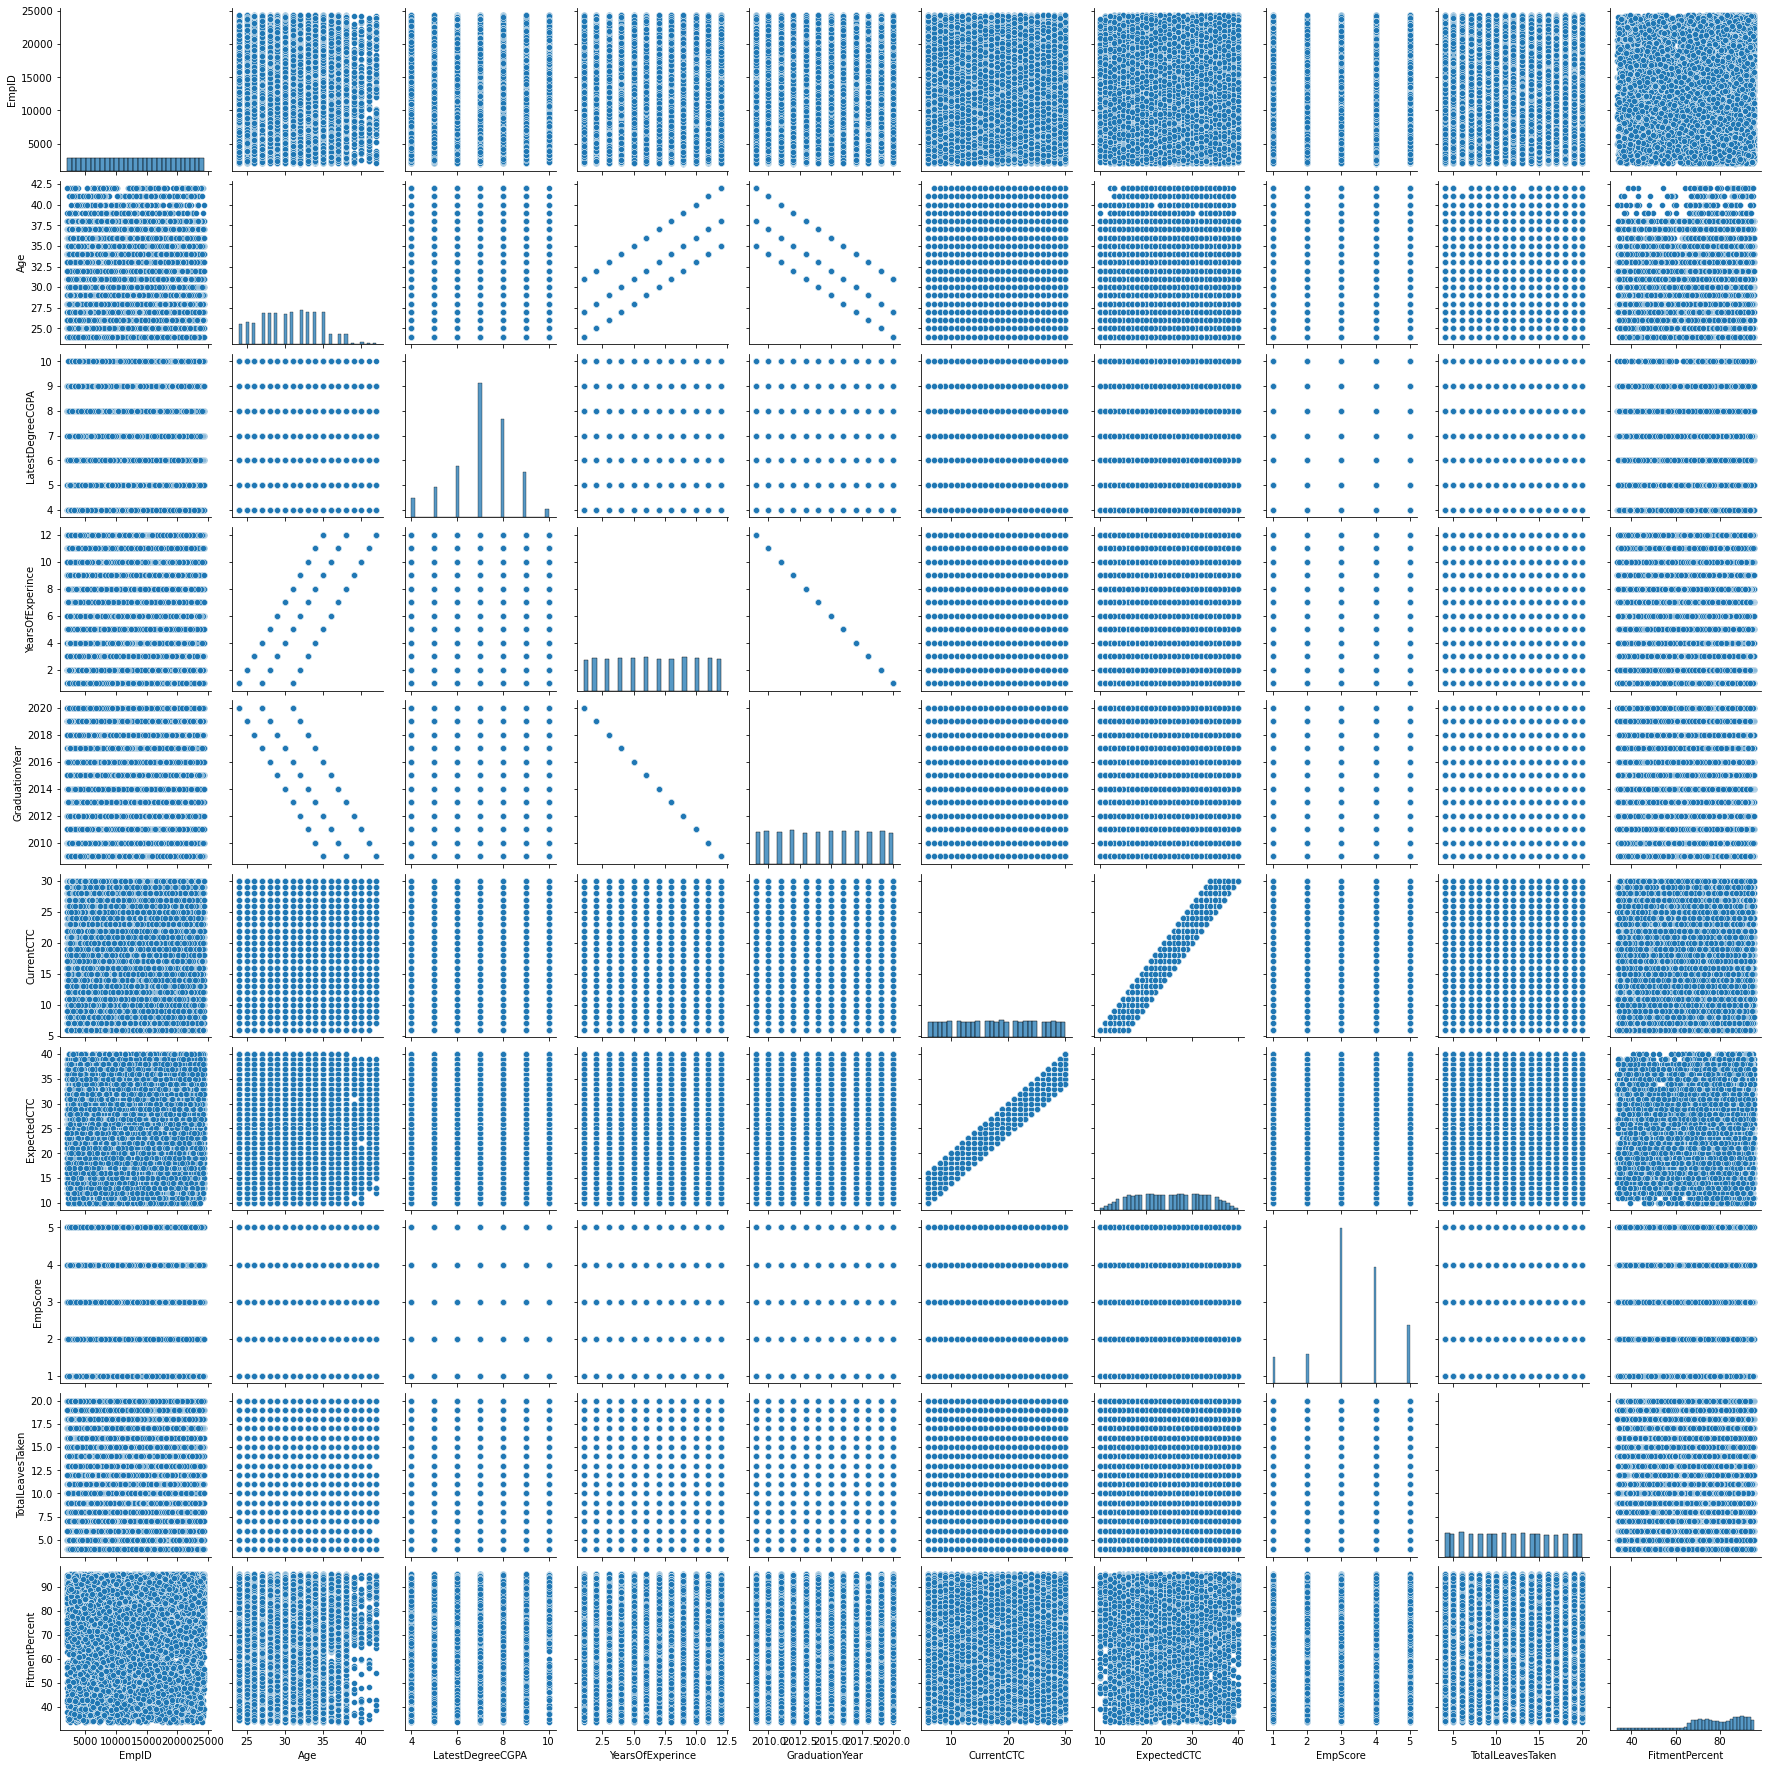

In [20]:
# The plots are ambiguous and do not give any clear patter between different attributes 
# apart from the attributes we have already dealt with
sns.pairplot(train) 

In [21]:
# Now, let us hot encode the columns which are not ordinal in nature.
from sklearn.preprocessing import OneHotEncoder
def oneHotEncode(dataset,column):
    encoder=OneHotEncoder()
    X = encoder.fit_transform(dataset[column].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(X, columns = [column +
                                          str(int(i)) for i in range(X.shape[1])]) 
    data = pd.concat([dataset, dfOneHot], axis=1)
    data.drop([column],inplace=True,axis=1)
    return data

train3=train2.copy()
train3.reset_index(drop=True,inplace=True)
non_ordinal_columns = ["LanguageOfCommunication","Gender","JobProfileIDApplyingFor","HighestDegree",
            "DegreeBranch","CurrentDesignation","DepartmentInCompany"]
for i in non_ordinal_columns:
    train3 = oneHotEncode(train3,i)

In [22]:
train3.head()

,Age,GraduatingInstitute,LatestDegreeCGPA,CurrentCTC,MartialStatus,EmpScore,CurrentCompanyType,TotalLeavesTaken,FitmentPercent,LanguageOfCommunication0,...,CurrentDesignation3,CurrentDesignation4,CurrentDesignation5,CurrentDesignation6,CurrentDesignation7,DepartmentInCompany0,DepartmentInCompany1,DepartmentInCompany2,DepartmentInCompany3,DepartmentInCompany4
0,35,1,7,21,0,5,2,20,95.40,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,26,3,7,15,0,5,1,6,67.09,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,36,1,6,15,1,5,1,19,91.26,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,29,2,5,16,0,5,0,16,72.29,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,25,3,8,24,0,5,2,10,86.34,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
# Now seprating test and train set
train_final = train3.iloc[:13645,:].copy()
test_final = train3.iloc[13646:,:].copy()

In [24]:
test_final.drop(["FitmentPercent"],axis=1,inplace=True)

In [25]:
# Data Preparation
target = train_final["FitmentPercent"]
train_final.drop(["FitmentPercent"],axis=1,inplace=True)
from sklearn.model_selection import train_test_split
trainX,valX,trainY,valY = train_test_split(train_final,target,test_size=0.2)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10,shuffle=True,random_state=0)
model_lr= LinearRegression()
model_lr.fit(trainX,trainY)
score_lr = cross_val_score(model_lr, valX,valY,scoring="r2",cv=cv,n_jobs=-1)
print("mean:",score_lr.mean())

mean: 0.3432466112829044


In [33]:
from sklearn.ensemble import RandomForestRegressor
model_lr= RandomForestRegressor()
model_lr.fit(trainX,trainY)
score_lr = cross_val_score(model_lr, valX,valY,scoring="r2",cv=cv,n_jobs=-1)
print("mean:",score_lr.mean())

mean: 0.6095435834658458


In [34]:
model_lr.predict(test_final)

array([89.5625, 83.1403, 52.923 , ..., 80.7753, 53.4257, 53.0965])

In [28]:
from sklearn.svm import SVR
model_lr= SVR()
model_lr.fit(trainX,trainY)
score_lr = cross_val_score(model_lr, valX,valY,scoring="r2",cv=cv,n_jobs=-1)
print("mean:",score_lr.mean())

mean: 0.02786048659104424


In [29]:
from sklearn.neighbors import KNeighborsRegressor
model_lr= KNeighborsRegressor()
model_lr.fit(trainX,trainY)
score_lr = cross_val_score(model_lr, valX,valY,scoring="r2",cv=cv,n_jobs=-1)
print("mean:",score_lr.mean())

mean: 0.02276440326070861


In [30]:
# Best r2 score has been obtained from RandomForestRegressor. We can tweak some of its parameters to see if
# it brings any changes to the r2 score.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
model_rf= RandomForestRegressor()
grid_rf=GridSearchCV(estimator=model_rf,param_grid=param_grid,scoring="r2",cv=5,verbose=1,n_jobs=-1)
grid_rf.fit(trainX,trainY)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='r2', verbose=1)

In [31]:
print(grid_rf.best_estimator_)

RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000)


In [32]:
print(grid_rf.score(valX,valY))

0.4705461488686107


In [36]:
# Now let us find out about the Relevance factor involved in fitment%
train_final1 = pd.concat([train_final, train["BiasInfluentialFactor"]],axis=0)

In [37]:
train_final1.head()

,0,Age,CurrentCTC,CurrentCompanyType,CurrentDesignation0,CurrentDesignation1,CurrentDesignation2,CurrentDesignation3,CurrentDesignation4,CurrentDesignation5,...,JobProfileIDApplyingFor5,JobProfileIDApplyingFor6,JobProfileIDApplyingFor7,JobProfileIDApplyingFor8,LanguageOfCommunication0,LanguageOfCommunication1,LanguageOfCommunication2,LatestDegreeCGPA,MartialStatus,TotalLeavesTaken
0,NaN,35.0,21.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,20.0
1,NaN,26.0,15.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,6.0
2,NaN,36.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,1.0,19.0
3,NaN,29.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,16.0
4,NaN,25.0,24.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,0.0,10.0
